# Import of libreries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

# Import the raw data of Proyect Long-term energy environment data for ORNL Research House

In [2]:
#Data import 
DataFolderPath = "/Users/Marrugo/Dropbox/git_for_clone/Ac consumption prediction of ORNL Research House--MARRUGO--THOUVENIN/data_Oak_Ride_National_Laboratory.csv"
DF_Data_RAW = pd.read_csv(DataFolderPath,sep = ",",index_col=0) 

/Users/Marrugo/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (68,71,83,84,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Convert the index of the Data in datatime type

In [3]:
previousIndex= DF_Data_RAW.index
NewparsedIndex = pd.to_datetime(previousIndex)
DF_Data_RAW.index= NewparsedIndex

# Definition of functions

Function of lagged data for one column

In [5]:
def lag_column(df,column_name,lag_period=1):
    for i in range(1,lag_period+1,1):
        new_column_name = column_name+"-"+str(i*15)+"min"
        df[new_column_name]=df[column_name].shift(i)
    return df

Function of lagged data for all columns

In [7]:
def lag_columnall(df,lag_period=1):
    for column_name in df.columns.tolist():
        for i in range(1,36+1,1):
            new_column_name = column_name+"-"+str(i*15)+"min"
            df[new_column_name]=df[column_name].shift(i)
    return df

Function of time features for the data 

In [8]:
def features_creation(df):
    # creatures time based features from pandas dataframe
    # such hour of day, weekday/weekend, day/night and so on
    # sin hour and cos hour as just indirect representation of time of day
    df['sin_hour'] = np.sin((df.index.hour)*2*np.pi/24)
    df['cos_hour'] = np.cos((df.index.hour)*2*np.pi/24)#later try 24 vector binary format
    df['hour'] = df.index.hour # 0 to 23
    df['day_of_week'] = df.index.dayofweek #Monday = 0, sunday = 6
    df['weekend'] = [ 1 if day in (5, 6) else 0 for day in df.index.dayofweek ] # 1 for weekend and 0 for weekdays
    df['month'] = df.index.month
    df['week_of_year'] = df.index.week
    # day = 1 if(10Hrs -19Hrs) and Night = 0 (otherwise)
    df['day_night'] = [1 if day<20 and day>9 else 0 for day in df.index.hour ]
    return df

# Creating lagged data for 9 hours

In [9]:
#Data Lagged
DF_data_raw=DF_Data_RAW.drop("RECORD",axis=1)
DF_data_raw=DF_data_raw.astype("float64")
DF_data_raw_lagged=lag_columnall(DF_data_raw,36)

# Correlation of the lagged data

Correlating the data

In [10]:
#correlation of data
correlation=DF_data_raw_lagged.corr()

Saving the correlation in a .CSV file

In [29]:
DataFolderPath1 = "/Users/Marrugo/Dropbox/git_for_clone/Ac consumption prediction of ORNL Research House--MARRUGO--THOUVENIN/data_correlation.csv"
correlation.to_csv(DataFolderPath1,sep = ",") 

# Data selection of good correlation

Selecting the output data that is the total Ac consumption of the house 

In [19]:
#Data selection
DF_TotalEnergy=DF_Data_RAW[["main_Tot"]]

Selecting the input data from the Raw data (Temperature,relativity humidity, wind speed, solar radiation, precipitation, roof relative humidity, roof temperature, attic relative humidity, temperature of floor 1 and temperature of floor 2)

In [11]:

DF_Input1=DF_Data_RAW.loc[:,"Outside_Tmp_Avg":"wind_speed_mean"]
DF_solar_radiation=DF_Data_RAW[["SlrW1_Avg"]]
DF_Precipitation=DF_Data_RAW[["Rain_in_Tot"]]
DF_dryer=DF_Data_RAW[["dryer_Tot"]]
DF_RH_lvl1=DF_Data_RAW[["LVL1_RH_Avg"]]
DF_RH_lvl2=DF_Data_RAW[["LVL2_RH_Avg"]]
DF_WallNava_RH=DF_Data_RAW[["WallNcav_RH_Avg"]]
DF_RoofN_RH=DF_Data_RAW[["RoofN_RH_Avg"]]
DF_Roofn_tmp=DF_Data_RAW[["RoofN_tmp_Avg"]]

Combining the output data and the input data

In [20]:
#Data selected compilation
DF_Data_selected=DF_TotalEnergy.join([DF_Input1,DF_solar_radiation,DF_Roofn_tmp,DF_RoofN_RH,DF_Precipitation,DF_WallNava_RH,DF_dryer,DF_RH_lvl2,DF_RH_lvl1])

Cleaning the non value data

In [33]:
DF_Data_selected_clean = DF_Data_selected.dropna()

Converting the data to float64 to do the correlation

In [13]:
#Data conversion 
DF_Data_selected_float64=DF_Data_selected_clean.astype("float64")

Adding the time base features to data

In [32]:
#Changing the name of the columns 
Data_final=features_creation(DF_Data_selected_float64)

Replacing the name of the columns

In [31]:
Data_final.rename(columns = {'main_Tot':"AC_consump"},inplace=True)
Data_final.rename(columns = {'Outside_Tmp_Avg':"Temperature_Avg"},inplace=True)
Data_final.rename(columns = {'Outside_RH_Avg':"Relative_Humidity"},inplace=True)
Data_final.rename(columns = {'SlrW1_Avg':"Solar_radiation"},inplace=True)
Data_final.rename(columns = {'Rain_in_Tot':"Precipitation"},inplace=True)
Data_final.rename(columns = {'dryer_Tot':"Dryer"},inplace=True)
Data_final.rename(columns = {'LVL1_RH_Avg':"RH_lvl1"},inplace=True)
Data_final.rename(columns = {'LVL2_RH_Avg':"RH_lvl2"},inplace=True)
Data_final.rename(columns = {'WallNcav_RH_Avg':"RH_roof_cavity"},inplace=True)
Data_final.rename(columns = {'RoofN_RH_Avg':"RH_roof_north"},inplace=True)
Data_final.rename(columns = {'RoofN_tmp_Avg':"RH_temp_notth"},inplace=True)

Showing the first 5 rows of the final data

In [30]:
Data_final.head()

,AC_consump,Temperature_Avg,Relative_Humidity,wind_speed_mean,Solar_radiation,RH_temp_notth,RH_roof_north,Precipitation,RH_roof_cavity,Dryer,...,Temperature_Avg-5.45 hrs,Relative_Humidity-5.0 hrs,Relative_Humidity-5.15 hrs,Relative_Humidity-5.3 hrs,Precipitation-0.45 hrs,Precipitation-3 hrs,RH_roof_north-9 hrs,RH_roof_north-9.15 hrs,RH_temp_notth-9 hrs,RH_temp_notth-9.15 hrs
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2013-10-01 09:30:00,347.5,60.44,94.4,0.0,75.62,60.39,61.82,0.0,66.68,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01 09:45:00,305.0,61.48,94.1,0.0,92.90,61.75,60.85,0.0,66.63,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01 10:00:00,292.5,62.69,93.3,0.0,105.40,63.20,59.73,0.0,66.60,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01 10:15:00,627.5,63.56,91.4,0.0,119.40,64.61,58.76,0.0,66.62,0.5,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2013-10-01 10:30:00,192.5,64.44,88.9,0.0,139.00,66.02,57.96,0.0,66.63,0.5,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


# Data lagged selected

Adding the best correlated lagged data with respect to the AC consumption to the final data

In [27]:
#solar radiation lagged data
Data_final["Solar_radiation-6.15 hrs"]=Data_final["Solar_radiation"].shift(25)
Data_final["Solar_radiation-6.3 hrs"]=Data_final["Solar_radiation"].shift(26)
Data_final["Solar_radiation-6.45 hrs"]=Data_final["Solar_radiation"].shift(27)

#temperature lagged data
Data_final["Temperature_Avg-5.15 hrs"]=Data_final["Temperature_Avg"].shift(21)
Data_final["Temperature_Avg-5.3 hrs"]=Data_final["Temperature_Avg"].shift(22)
Data_final["Temperature_Avg-5.45 hrs"]=Data_final["Temperature_Avg"].shift(23)

#relative humidity lagged data
Data_final["Relative_Humidity-5.0 hrs"]=Data_final["Relative_Humidity"].shift(20)
Data_final["Relative_Humidity-5.15 hrs"]=Data_final["Relative_Humidity"].shift(21)
Data_final["Relative_Humidity-5.3 hrs"]=Data_final["Relative_Humidity"].shift(22)

#precipitation lagged data 
Data_final["Precipitation-0.45 hrs"]=Data_final["Precipitation"].shift(3)
Data_final["Precipitation-3 hrs"]=Data_final["Precipitation"].shift(12)

#Roof north relative humidity lagged data 
Data_final["RH_roof_north-9 hrs"]=Data_final["RH_roof_north"].shift(36)
Data_final["RH_roof_north-9.15 hrs"]=Data_final["RH_roof_north"].shift(37)

#Roof north temperature lagged data 
Data_final["RH_temp_notth-9 hrs"]=Data_final["RH_temp_notth"].shift(36)
Data_final["RH_temp_notth-9.15 hrs"]=Data_final["RH_temp_notth"].shift(37)

Organize the final data according with the lagged made

In [34]:
#Final data for linear regression 
Data_final.dropna(inplace=True)

Showing the first 5 rows of the final data with the lagged data

In [35]:
Data_final.head()

,AC_consump,Temperature_Avg,Relative_Humidity,wind_speed_mean,Solar_radiation,RH_temp_notth,RH_roof_north,Precipitation,RH_roof_cavity,Dryer,...,Temperature_Avg-5.45 hrs,Relative_Humidity-5.0 hrs,Relative_Humidity-5.15 hrs,Relative_Humidity-5.3 hrs,Precipitation-0.45 hrs,Precipitation-3 hrs,RH_roof_north-9 hrs,RH_roof_north-9.15 hrs,RH_temp_notth-9 hrs,RH_temp_notth-9.15 hrs
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2013-10-01 18:45:00,332.5,73.18,68.92,0.0,17.650,87.6,40.82,0.0,63.59,0.5,...,74.44,57.36,59.62,64.57,0.0,0.0,60.85,61.82,61.75,60.39
2013-10-01 19:00:00,197.5,71.59,73.92,0.0,12.610,85.9,41.89,0.0,63.56,0.5,...,74.62,57.79,57.36,59.62,0.0,0.0,59.73,60.85,63.20,61.75
2013-10-01 19:15:00,462.5,70.26,76.02,0.0,7.179,84.0,42.97,0.0,63.56,0.5,...,77.53,58.28,57.79,57.36,0.0,0.0,58.76,59.73,64.61,63.20
2013-10-01 19:30:00,480.0,68.99,79.21,0.0,2.344,82.1,44.09,0.0,63.57,0.5,...,78.07,54.68,58.28,57.79,0.0,0.0,57.96,58.76,66.02,64.61
2013-10-01 19:45:00,515.0,67.63,83.50,0.0,0.273,80.0,45.49,0.0,63.62,0.5,...,77.37,55.73,54.68,58.28,0.0,0.0,57.13,57.96,67.39,66.02


# Machine learning implementation

Defining the target of the random forest regression

In [36]:
DF_target = Data_final["AC_consump"]

Defining the features of the random forest regression

In [37]:
DF_features = Data_final.drop("AC_consump",axis=1)

Importing the train test split librery

In [38]:
#importing train test split 
from sklearn.model_selection import train_test_split

Defining the data from train and test random forest regression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(DF_features, DF_target, test_size=0.2, random_state=41234)

Importing the random forest regression model librery

In [22]:
#importing random forest regression 
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [40]:
#training random forest regression with cross validation 
from sklearn.model_selection import cross_val_predict

Predicting data with the test data with the model of random forest

In [41]:
predict = cross_val_predict(reg,DF_features,DF_target,cv=25)

Creating a series data with the predicte data using the random forest model

In [42]:
predictions = pd.Series(predict,index=DF_target.index).rename("AC_consump"+'_predicted')

Creating a data frame with the predicted data and the test data

In [43]:
predictions_frame = predictions.to_frame()
predictions_frame["AC_consump"]=DF_target

# Results

Ploting the prediction and the test data for the range of date (2014-09-01:2014-09-03)

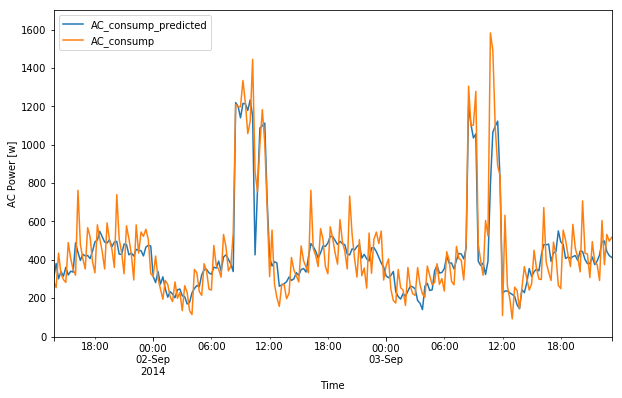

In [25]:
#Ploting linear regression results for a specifc data range
predictions_frame['2014-09-01 13:45:00':'2014-09-03 23:15:00'].plot()
plt.xlabel('Time')
plt.ylabel('AC Power [w]')
plt.ylim([0,1700])
plt.show()

Importing the libraries for the square error, mean error and mean square error

In [26]:
#importing metrics for the data error 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Calculating the squared error, mean absolute error and mean squared absuluted error

In [17]:
R2_score = r2_score(predictions_frame["AC_consump"],predictions_frame["AC_consump_predicted"])
Mean_absolute=mean_absolute_error(predictions_frame["AC_consump"],predictions_frame["AC_consump_predicted"])
Mean_absolute_square=mean_squared_error(predictions_frame["AC_consump"],predictions_frame["AC_consump_predicted"])

Showing the results of the errors

In [16]:
#showing results of data error
print " The square error of the predicted data is "+str(R2_score)+"\n"
print " The mean absolute error of the predicted data is "+str(Mean_absolute)+"\n"
print " The mean absolute square error of the predicted data is "+str(Mean_absolute_square)+"\n"



 The square error of the predicted data is 0.564134889576

 The mean absolute error of the predicted data is 110.62194081

 The mean absolute square error of the predicted data is 24275.7759336

